In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [2]:
df = pd.read_csv('/content/diabetes1.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.Outcome.unique()

array([1, 0])

In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
features = df.drop("Outcome", axis= 1)
target = df.Outcome

In [11]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X=features)

StandardScaler()

In [15]:
stanarized_data =scaler.transform(features)

In [16]:
features = stanarized_data
features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2, 
                                                    random_state= 2)

In [18]:
model = LogisticRegression()

In [19]:
# Train the model with the training variables x/ytrain both
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
# prediction on the training Data
# X train -- Y train 
x_train_pred = model.predict(x_train)
x_train_accuracy = accuracy_score(y_true = y_train, y_pred = x_train_pred)

In [25]:
x_train_accuracy * 100

0.7801302931596091

In [27]:
# prediction on the Testing Data
# X test - Y test 
x_test_pred = model.predict(x_test)
x_test_accuracy = accuracy_score(y_test, x_test_pred)

In [29]:
x_test_accuracy * 100

76.62337662337663

In [51]:
from sklearn.metrics import confusion_matrix
# for training Data
cm = confusion_matrix(
  y_true = y_test,
  y_pred = x_test_pred
)

In [52]:
print(cm)

[[96 13]
 [23 22]]


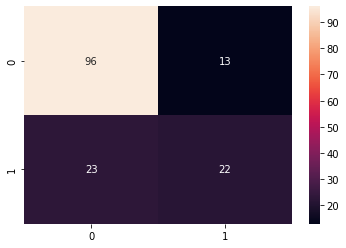

In [53]:
import seaborn as sns

sns.heatmap(cm, annot= True, annot_kws={"size": 10})
plt.show()

In [71]:
# making predictions
data = (0,131,0,0,0,43.2,0.27,26) # numbers for each column (feature)
data_array = np.asarray(data) # convert to array
reshaped_data = data_array.reshape(1,-1) # reshape  from (8,)to be (1,8)

#scale the data
data_std = scaler.transform(reshaped_data)

prediction = model.predict(data_std) ## result will be array [0] or [1]
print(prediction[0])
if prediction[0] == 1:
  print("The person has diabetes")
else :
    print("The person dose not have diabetes")

1
The person has diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
